**I've made this tracker with personal reasons in mind. I want to track covid19 numbers from four countries specifically to draw certain conclusions which may be wrong since it the pandemic is a live situation and data sanity cannot be maintained completely. So whatever conclusions I may draw please take it with a grain of salt and know that these are my biases**

**I've sourced data from the following Public APIs https://api.covid19india.org/data.json and https://corona-api.com/countries/:code**

I'm going in this project with the knowledge that US is the worst hit and South Korea handled the pandemic in the best way possible and the hypothesis that India and Canada are somewhere in between tending towards South Korea and not the US. I want to validate my hypothesis using data of daily infections, recovery and deaths in both India and Canada individually first and then compare it with other nations

In [0]:
!pip install dateparser
import requests
import json
import math
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import dateparser
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import re

     |████████████████████████████████| 358kB 2.7MB/s 


In [0]:
request = requests.get("https://api.covid19india.org/data.json")
json_obj = json.loads(request.text)

In [0]:
N = len([json_obj['cases_time_series'][i]['date'].strip() for i in range(len(json_obj['cases_time_series']))])

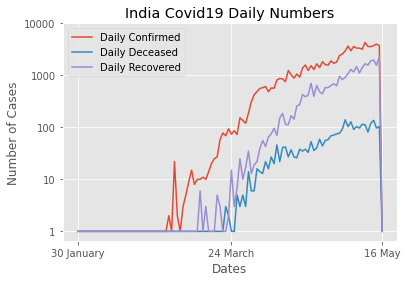

In [0]:

x = [json_obj['cases_time_series'][i]['date'].strip() for i in range(len(json_obj['cases_time_series']))]

y = [math.log(int(json_obj['cases_time_series'][i]['dailyconfirmed']),10)
             if(json_obj['cases_time_series'][i]['dailyconfirmed'] != '0')
             else 0
             for i in range(len(json_obj['cases_time_series'])) 
        ]

y1 = [math.log(int(json_obj['cases_time_series'][i]['dailydeceased']),10)
             if(json_obj['cases_time_series'][i]['dailydeceased'] != '0')
             else 0
             for i in range(len(json_obj['cases_time_series'])) 
        ]

y2 = [math.log(int(json_obj['cases_time_series'][i]['dailyrecovered']),10)
             if(json_obj['cases_time_series'][i]['dailyrecovered'] != '0')
             else 0
             for i in range(len(json_obj['cases_time_series'])) 
        ]

plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)

plt.title('India Covid19 Daily Numbers')
plt.xlabel('Dates')
plt.ylabel('Number of Cases')

plt.legend(['Daily Confirmed', 'Daily Deceased', 'Daily Recovered'], loc='upper left')

plt.xticks([x[0],x[int(len(x)/2)],x[-1]])
plt.yticks(np.arange(len(np.logspace(0,int(np.max(y)+1),num=int(np.max(y)+1)+1,base=10,dtype='int'))),
           np.logspace(0,int(np.max(y)+1),num=int(np.max(y)+1)+1,base=10,dtype='int')) 
plt.show()

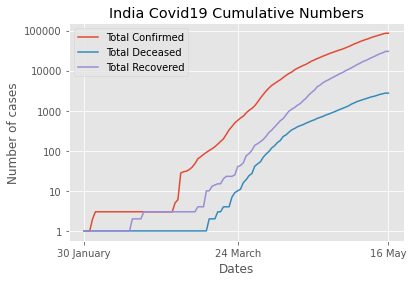

In [0]:

x = [json_obj['cases_time_series'][i]['date'].strip() for i in range(len(json_obj['cases_time_series']))]

y = [math.log(int(json_obj['cases_time_series'][i]['totalconfirmed']),10)
             if(json_obj['cases_time_series'][i]['totalconfirmed'] != '0')
             else 0
             for i in range(len(json_obj['cases_time_series']))]

y1 = [math.log(int(json_obj['cases_time_series'][i]['totaldeceased']),10)
             if(json_obj['cases_time_series'][i]['totaldeceased'] != '0')
             else 0
             for i in range(len(json_obj['cases_time_series'])) 
        ]
y2 = [math.log(int(json_obj['cases_time_series'][i]['totalrecovered']),10)
             if(json_obj['cases_time_series'][i]['totalrecovered'] != '0')
             else 0
             for i in range(len(json_obj['cases_time_series'])) 
        ]

plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)

plt.legend(['Total Confirmed', 'Total Deceased', 'Total Recovered'], loc='upper left')
plt.title('India Covid19 Cumulative Numbers')
plt.xlabel('Dates')
plt.ylabel('Number of cases')

plt.xticks([x[0],x[int(len(x)/2)],x[-1]])
plt.yticks(np.arange(len(np.logspace(0,int(np.max(y)+1),num=int(np.max(y)+1)+1,base=10,dtype='int'))),
           np.logspace(0,int(np.max(y)+1),num=int(np.max(y)+1)+1,base=10,dtype='int')) 
plt.show()
plt.show()

Curve is trending upwards after flattening out in the intial phase when local transmission was not occuring

In [0]:
country_codes = [
    'US','CA','IN','KR','DE'          ### Add or delete any country code here for the respective data 
]

base_url = 'https://corona-api.com/countries/'

json_obj_int = []
for code in country_codes:
    country_url = base_url+code
    request_int = requests.get(country_url)
    json_obj_int.append(json.loads(request_int.text))

Looking at global numbers 

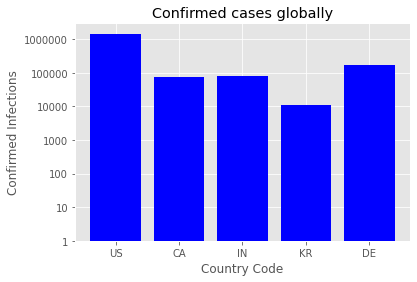

In [0]:
x = country_codes
confirmed = [math.log(json_obj_int[i]['data']['latest_data']['confirmed'],10) for i in range(len(json_obj_int))]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, confirmed, color='blue')
plt.xlabel("Country Code")
plt.ylabel("Confirmed Infections")
plt.title("Confirmed cases globally")

#plt.yticks([0,1,2,3,4,5,6],['0','10','100','1k','10k','100k','1M'])
plt.yticks(np.arange(len(np.logspace(0,int(np.max(confirmed)),num=int(np.max(confirmed))+1,base=10,dtype='int'))),
           np.logspace(0,int(np.max(confirmed)),num=int(np.max(confirmed))+1,base=10,dtype='int')) 
plt.xticks(np.arange(len(country_codes)), country_codes)
plt.show()

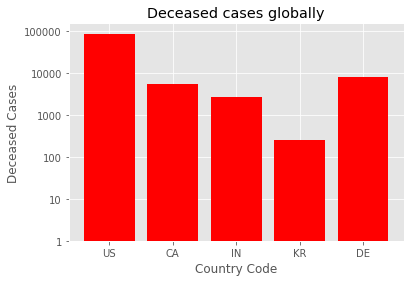

In [0]:
x = country_codes
deaths = [math.log(json_obj_int[i]['data']['latest_data']['deaths'],10) for i in range(len(json_obj_int))]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, deaths, color='red')
plt.xlabel("Country Code")
plt.ylabel("Deceased Cases")
plt.title("Deceased cases globally")

#plt.yticks([0,1,2,3,4],['0','10','100','1k','10k'])
plt.yticks(np.arange(len(np.logspace(0,int(np.max(deaths)+1),num=int(np.max(deaths)+1)+1,base=10,dtype='int'))),
           np.logspace(0,int(np.max(deaths)+1),num=int(np.max(deaths)+1)+1,base=10,dtype='int'))
plt.xticks(np.arange(len(country_codes)), country_codes)
plt.show()

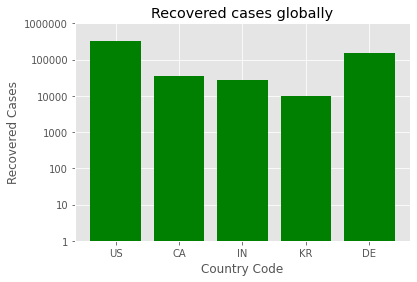

In [0]:
x = country_codes
recovered = [math.log(json_obj_int[i]['data']['latest_data']['recovered'],10) 
             if json_obj_int[i]['data']['latest_data']['recovered']!=0
             else 0
             for i in range(len(json_obj_int))]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, recovered, color='green')
plt.xlabel("Country Code")
plt.ylabel("Recovered Cases")
plt.title("Recovered cases globally")

#plt.yticks([0,1,2,3,4],['0','10','100','1k','10k'])
plt.yticks(np.arange(len(np.logspace(0,int(np.max(recovered)+1),num=int(np.max(recovered)+1)+1,base=10,dtype='int'))),
           np.logspace(0,int(np.max(recovered)+1),num=int(np.max(recovered)+1)+1,base=10,dtype='int'))
plt.xticks(np.arange(len(country_codes)), country_codes)
plt.show()

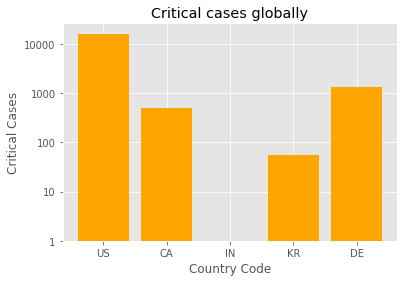

In [0]:
x = country_codes
critical = [math.log(json_obj_int[i]['data']['latest_data']['critical'],10) 
             if json_obj_int[i]['data']['latest_data']['critical']!=0
             else 0
             for i in range(len(json_obj_int))]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, critical, color='orange')
plt.xlabel("Country Code")
plt.ylabel("Critical Cases")
plt.title("Critical cases globally")

plt.yticks([0,1,2,3,4],['0','10','100','1k','10k'])
plt.yticks(np.arange(len(np.logspace(0,int(np.max(critical)),num=int(np.max(critical))+1,base=10,dtype='int'))),
           np.logspace(0,int(np.max(critical)),num=int(np.max(critical))+1,base=10,dtype='int')) 
plt.xticks(np.arange(len(country_codes)), country_codes)
plt.show()

India are not reporting any criritical cases which is not the ground truth

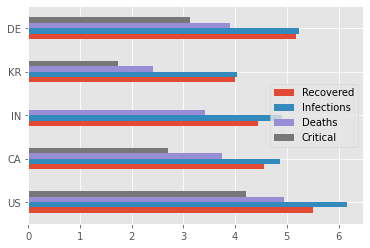

In [0]:
df_for_stacked_chart = pd.DataFrame({'Recovered': recovered,
                    'Infections': confirmed,
                    'Deaths':deaths,
                    'Critical':critical}, index=country_codes)

ax = df_for_stacked_chart.plot.barh()

Looking at all the data together Korea has the best recovery rate since the recovered and infected are very close to each other. US has almost 10 times more infected cases than recovered cases. India and Canada are somewhere in between but not as worse as US and not as good as South Korea as hypothesised.

Munging data to get daily recovery rates for each country

In [0]:
for i in range(len(json_obj_int)):
    for j in range(len(json_obj_int[i]['data']['timeline'])):
        json_obj_int[i]['data']['timeline'][j]['date_parsed'] = str(dateparser.parse(json_obj_int[i]['data']['timeline'][j]['date']).date())
        json_obj_int[i]['data']['timeline'][j]['date_obj'] = dateparser.parse(json_obj_int[i]['data']['timeline'][j]['date'])

N = len(list(set([(json_obj_int[i]['data']['timeline'][j]['date_parsed']) for i in range(len(json_obj_int))
                            for j in range(len(json_obj_int[i]['data']['timeline']))])))

df = pd.DataFrame({
                'date':list(set([(json_obj_int[i]['data']['timeline'][j]['date_parsed']) for i in range(len(json_obj_int))
                            for j in range(len(json_obj_int[i]['data']['timeline']))]))
                })
df_list = []
for i in range(len(json_obj_int)):
    new_confirmed = []
    new_recovered = []
    new_deaths = []
    date = []
    
    for j in range(len(json_obj_int[i]['data']['timeline'])):
        new_confirmed.append(json_obj_int[i]['data']['timeline'][j]['new_confirmed'])
        new_recovered.append(json_obj_int[i]['data']['timeline'][j]['new_recovered'])
        new_deaths.append(json_obj_int[i]['data']['timeline'][j]['new_deaths'])
        date.append((json_obj_int[i]['data']['timeline'][j]['date_parsed']))
    df_temp = pd.DataFrame({
                            'date':date,
                            'new_confirmed_'+json_obj_int[i]['data']['name']:new_confirmed,
                            'new_recovered_'+json_obj_int[i]['data']['name']:new_recovered,
                            'new_deaths_'+json_obj_int[i]['data']['name']:new_deaths
                            
                            })
    df_temp = df_temp.groupby(['date']).sum()
    df_temp = df_temp.reset_index()
    df_temp = df_temp.sort_values('date')
    
    df_temp['cumulative_recovered_'+json_obj_int[i]['data']['name']] = df_temp['new_recovered_'+json_obj_int[i]['data']['name']].cumsum()
    df_temp['cumulative_confirmed_'+json_obj_int[i]['data']['name']] = df_temp['new_confirmed_'+json_obj_int[i]['data']['name']].cumsum()
    
    #df_temp['recovery_rate_'+json_obj_int[i]['data']['name']] = df_temp['cumulative_recovered_'+json_obj_int[i]['data']['name']]*100/(df_temp['cumulative_confirmed_'+json_obj_int[i]['data']['name']]+df_temp['cumulative_recovered_'+json_obj_int[i]['data']['name']])
    df_temp['recovery_rate_'+json_obj_int[i]['data']['name']] = df_temp['cumulative_recovered_'+json_obj_int[i]['data']['name']]*100/(df_temp['cumulative_confirmed_'+json_obj_int[i]['data']['name']])
    

    for index,row in df_temp.iterrows():
        if(df_temp['recovery_rate_'+json_obj_int[i]['data']['name']][index] == 100):
            df_temp['recovery_rate_'+json_obj_int[i]['data']['name']][index] = df_temp['recovery_rate_'+json_obj_int[i]['data']['name']][index-1]
    
    df_list.append(df_temp)
    df = df.merge(df_temp, how='left', on='date')
df = df.fillna(0)

df = df.sort_values('date').reset_index(drop = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In the following graph I've plotted the daily recovery rates which is the rate of recovery by the total number of infections till that day

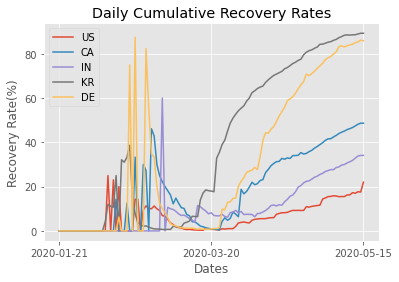

In [0]:

x = pd.Series(list(set([json_obj_int[i]['data']['timeline'][j]['date']
                        for i in range(len(json_obj_int))
                        for j in range(len(json_obj_int[i]['data']['timeline']))]))).sort_values().reset_index(drop = True)

ys = []
for col in df.columns:
  if('recovery_rate_' in col):
    ys.append(df[col])

# y = df.recovery_rate_India
# y1 = df.recovery_rate_USA
# y2 = df.recovery_rate_Canada
# y3 = df['recovery_rate_S. Korea']
# y4 = df.recovery_rate_Germany

for y in ys:
  plt.plot(x,y)
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.plot(x,y3)
# plt.plot(x,y4)

plt.title('Daily Cumulative Recovery Rates')
plt.legend(country_codes, loc='best')
plt.ylabel('Recovery Rate(%)')
plt.xlabel('Dates')
plt.xticks([x[0],x[int(len(x)/2)],x.iloc[-1]])
plt.show()

spikes in recovery rate could be due to insufficient testing but recovery rates are generally on the rise currently which is a good sign 

In [0]:
### Creating columns with Simple Moving Averages
for col in df.columns:
  if('recovery_rate_' in col):
     df[col+'_sma'] = df[col].rolling(window=10).mean()

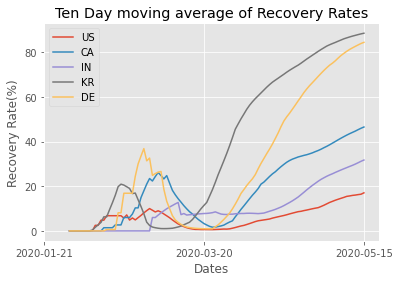

In [0]:

x = pd.Series(list(set([json_obj_int[i]['data']['timeline'][j]['date']
                        for i in range(len(json_obj_int))
                        for j in range(len(json_obj_int[i]['data']['timeline']))]))).sort_values().reset_index(drop = True)

ys = []
for col in df.columns:
  if('_sma' in col):
    ys.append(df[col])

# y = df.recovery_rate_India
# y1 = df.recovery_rate_USA
# y2 = df.recovery_rate_Canada
# y3 = df['recovery_rate_S. Korea']
# y4 = df.recovery_rate_Germany

for y in ys:
  plt.plot(x,y)
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.plot(x,y3)
# plt.plot(x,y4)

plt.title('Ten Day moving average of Recovery Rates')
plt.legend(country_codes, loc='best')
plt.ylabel('Recovery Rate(%)')
plt.xlabel('Dates')
plt.xticks([x[0],x[int(len(x)/2)],x.iloc[-1]])
plt.show()

Active - 1052654
Deaths - 86912
Critical - 16240
Recovered - 318027


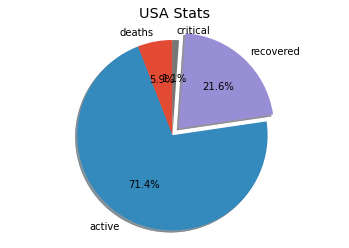

Active - 31838
Deaths - 5472
Critical - 502
Recovered - 36091


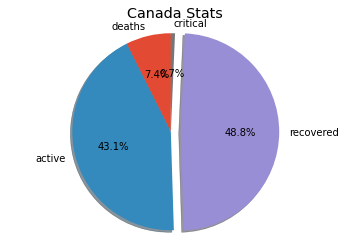

Active - 51379
Deaths - 2649
Critical - 0
Recovered - 27969


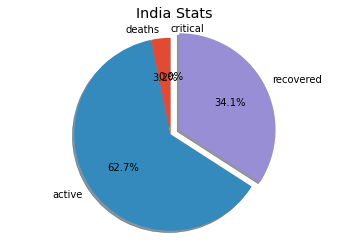

Active - 937
Deaths - 260
Critical - 55
Recovered - 9821


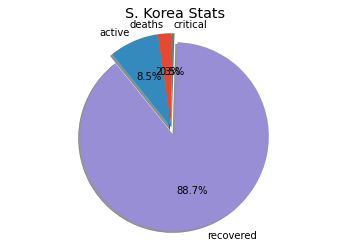

Active - 16747
Deaths - 7928
Critical - 1329
Recovered - 150300


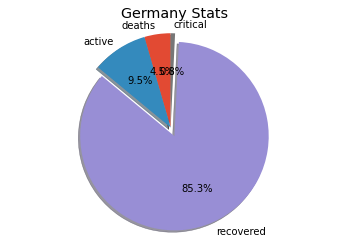

In [0]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
for i in range(len(json_obj_int)):
    labels = 'deaths', 'active', 'recovered', 'critical'
    sizes = [json_obj_int[i]['data']['latest_data']['deaths'], 
             (json_obj_int[i]['data']['latest_data']['confirmed']
             -json_obj_int[i]['data']['latest_data']['deaths']
             -json_obj_int[i]['data']['latest_data']['recovered']), 
             json_obj_int[i]['data']['latest_data']['recovered'],
             json_obj_int[i]['data']['latest_data']['critical']]
    explode = (0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
      
    print('Active - '+ str(json_obj_int[i]['data']['latest_data']['confirmed']
             -json_obj_int[i]['data']['latest_data']['deaths']
             -json_obj_int[i]['data']['latest_data']['recovered']))
    print('Deaths - '+ str(json_obj_int[i]['data']['latest_data']['deaths']))
    print('Critical - '+ str(json_obj_int[i]['data']['latest_data']['critical']))
    print('Recovered - '+ str(json_obj_int[i]['data']['latest_data']['recovered']))
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(json_obj_int[i]['data']['name']+' Stats')
    plt.show()

Above pie charts show South Korea and Germany are clearly acing this!

Although the data could not really prove my hypothesis that India and China are tending towards South Korea but it certainly suggests that they are doing a much better job than countries like USA are.